In [ ]:
!pip install qiskit==0.46.0
! pip install qiskit.ignis
!pip install pylatexenc
!pip install qiskit-aer==0.14.1

In [7]:
from qiskit import *

In [6]:
from qiskit.visualization import plot_histogram

In [8]:
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicProvider
from qiskit_aer.noise import NoiseModel, pauli_error, depolarizing_error

# Noise Model function

In [9]:
from IPython.core.interactiveshell import error
def get_noise(p_gate,p_measure):
  measure_error = pauli_error([('X',p_measure),('I',1-p_measure)])
  error_gate1 = depolarizing_error(p_gate,1)  # for 1 qubit gate error
  error_gate2 = error_gate1.tensor(error_gate1)  # for 2 qubit gate error

  noise_model = NoiseModel()

  # apply measurement error to noise model
  noise_model.add_all_qubit_quantum_error(measure_error,"measure")

  # apply 1 qubit error
  noise_model.add_all_qubit_quantum_error(error_gate1,["X"])

  # apply 1 qubit error
  noise_model.add_all_qubit_quantum_error(error_gate2,["CX"])

  return noise_model


# Create noise model

In [20]:
noise_model = get_noise(0.01,0.01)

# Encoding with physical qubits and effect of noise model

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


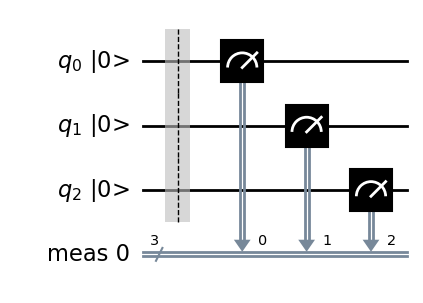

In [21]:
# create 3 qubit
circuit = QuantumCircuit(3)
circuit.measure_all()

circuit.draw(initial_state= True,output='mpl')

# Run on simulator without noise

/tmp/ipython-input-22-3268138242.py:1: DeprecationWarning: 'job_monitor' has been deprecated and will be removed in Qiskit 1.0.0.
  from qiskit.tools import job_monitor


Job Status: job has successfully run


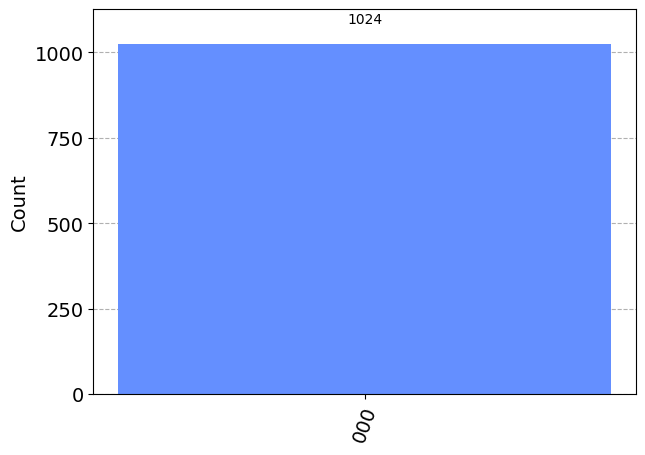

In [22]:
from qiskit.tools import job_monitor

# select simulator
simulator = Aer.get_backend('aer_simulator')


#run - Pass the circuit directly
job = simulator.run(circuit)

# monitor job
job_monitor(job)

#get result
result = job.result()

# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)

# Run on simulator with noise

/tmp/ipython-input-23-2488075629.py:1: DeprecationWarning: 'job_monitor' has been deprecated and will be removed in Qiskit 1.0.0.
  from qiskit.tools import job_monitor


Job Status: job has successfully run


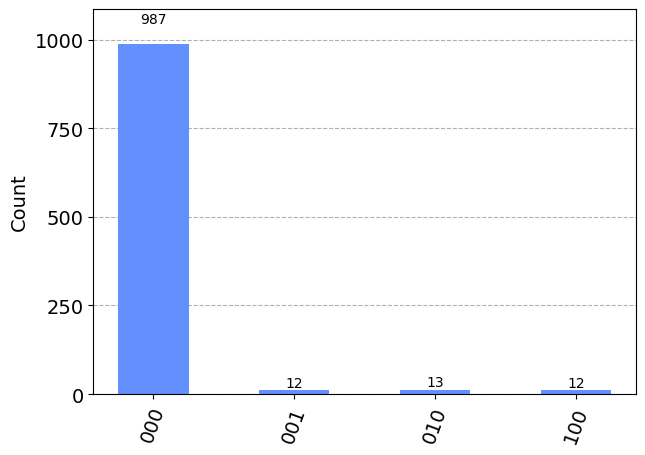

In [23]:
from qiskit.tools import job_monitor

# select simulator
simulator = Aer.get_backend('aer_simulator')

# Recreate the circuit to ensure no lingering instructions
circuit = QuantumCircuit(3)
circuit.measure_all()

#run - Pass the circuit directly
job = simulator.run(circuit, noise_model = noise_model )

# monitor job
job_monitor(job)

#get result
result = job.result()

# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)

# Encode logical 1 using 3 qubits

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


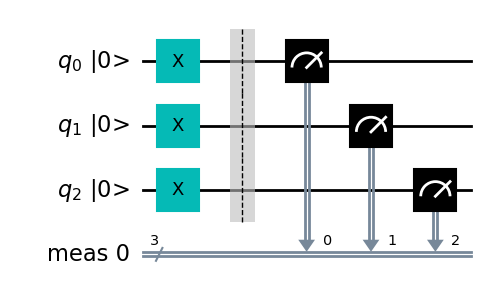

In [24]:
# create 3 qubit
circuit = QuantumCircuit(3)

# apply x gate
circuit.x([0,1,2])

circuit.measure_all()

circuit.draw(initial_state= True,output='mpl')

# run on simulator with noise

/tmp/ipython-input-25-2191076116.py:1: DeprecationWarning: 'job_monitor' has been deprecated and will be removed in Qiskit 1.0.0.
  from qiskit.tools import job_monitor


Job Status: job has successfully run


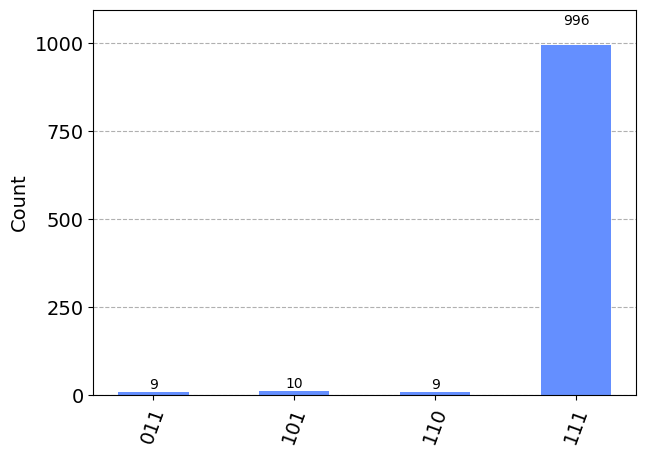

In [25]:
from qiskit.tools import job_monitor

# select simulator
simulator = Aer.get_backend('aer_simulator')

# Recreate the circuit
circuit = QuantumCircuit(3)

# apply x gate
circuit.x([0,1,2])

circuit.measure_all()


#run - Pass the circuit directly
job = simulator.run(circuit, noise_model = noise_model )

# monitor job
job_monitor(job)

#get result
result = job.result()

# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)

# increased error in noise model

In [26]:
# 50% probability
noise_model = get_noise(0.5,0.5)

# Run on simulator with noise

/tmp/ipython-input-27-2191076116.py:1: DeprecationWarning: 'job_monitor' has been deprecated and will be removed in Qiskit 1.0.0.
  from qiskit.tools import job_monitor


Job Status: job has successfully run


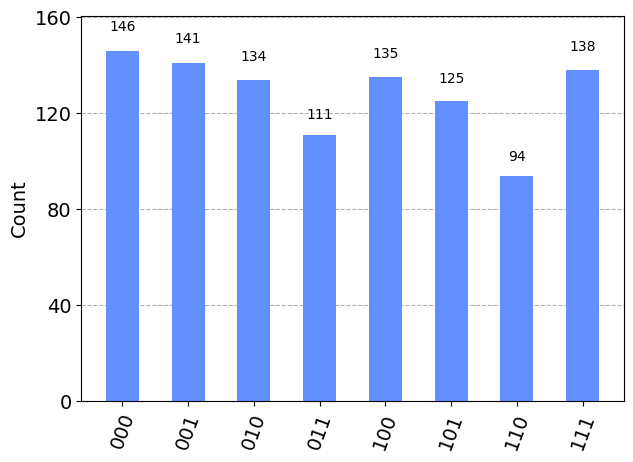

In [27]:
from qiskit.tools import job_monitor

# select simulator
simulator = Aer.get_backend('aer_simulator')

# Recreate the circuit to ensure no lingering instructions
circuit = QuantumCircuit(3)

# apply x gate
circuit.x([0,1,2])

circuit.measure_all()


#run - Pass the circuit directly
job = simulator.run(circuit, noise_model = noise_model )

# monitor job
job_monitor(job)

#get result
result = job.result()

# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)

# Syndrome measurement

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


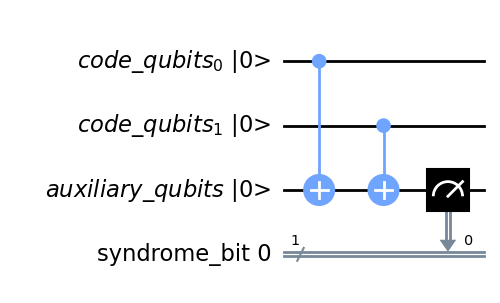

In [28]:
from qiskit.pulse import cx
# define 2 q register
qr1 = QuantumRegister(2,name='code_qubits')
qr2 = QuantumRegister(1,name='auxiliary_qubits')

# 1 classical register
cr1 = ClassicalRegister(1,name='syndrome_bit')

# create circuit
qc = QuantumCircuit (qr1,qr2,cr1)

# apply cx gate to both qubits
qc.cx(qr1[0],qr2[0])

qc.cx(qr1[1],qr2[0])
# measure auxiliary qubit
qc.measure(qr2[0], cr1[0])

# draw circuit
qc.draw()
qc.draw(initial_state=True,output = 'mpl')

# Run on simulator

In [29]:
from qiskit.tools import job_monitor

# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
#circuit.save_statevector()

#assemble
qobj = assemble(qc)

#run
job = simulator.run(qobj)

# monitor job
job_monitor(job)

#get result
result = job.result()

# get counts
counts = result.get_counts()

# plot histogram
#plot_histogram(counts)
print(counts)

/tmp/ipython-input-29-1429258972.py:1: DeprecationWarning: 'job_monitor' has been deprecated and will be removed in Qiskit 1.0.0.
  from qiskit.tools import job_monitor
/tmp/ipython-input-29-1429258972.py:13: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run
{'0': 1024}


# Encode logical 1 with 2 physical qubits

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


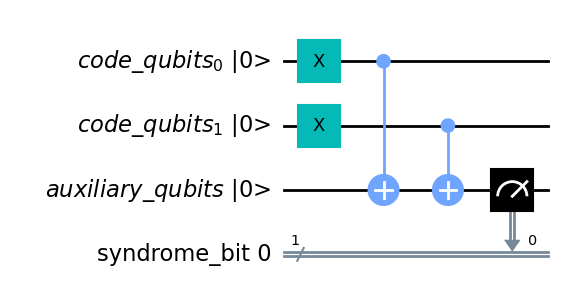

In [30]:
from qiskit.pulse import cx
# define 2 q register
qr1 = QuantumRegister(2,name='code_qubits')
qr2 = QuantumRegister(1,name='auxiliary_qubits')

# 1 classical register
cr1 = ClassicalRegister(1,name='syndrome_bit')

# create circuit
qc = QuantumCircuit (qr1,qr2,cr1)

# apply x gate
qc.x([qr1[0],qr1[1]])

# apply cx gate to both qubits
qc.cx(qr1[0],qr2[0])
qc.cx(qr1[1],qr2[0])

# measure auxiliary qubit
qc.measure(qr2[0], cr1[0])

# draw circuit
qc.draw(initial_state=True,output = 'mpl')

# Run on simulator

In [31]:
from qiskit.tools import job_monitor

# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
#circuit.save_statevector()

#assemble
qobj = assemble(qc)

#run
job = simulator.run(qobj)

# monitor job
job_monitor(job)

#get result
result = job.result()

# get counts
counts = result.get_counts()

# plot histogram
#plot_histogram(counts)
print(counts)

/tmp/ipython-input-31-1429258972.py:1: DeprecationWarning: 'job_monitor' has been deprecated and will be removed in Qiskit 1.0.0.
  from qiskit.tools import job_monitor
/tmp/ipython-input-31-1429258972.py:13: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run
{'0': 1024}


# Prepare code qubits in superposition

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


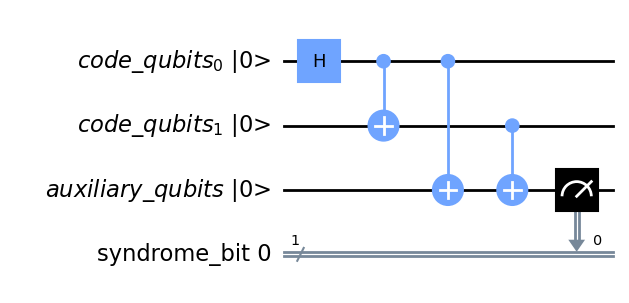

In [32]:
from qiskit.pulse import cx
# define 2 q register
qr1 = QuantumRegister(2,name='code_qubits')
qr2 = QuantumRegister(1,name='auxiliary_qubits')

# 1 classical register
cr1 = ClassicalRegister(1,name='syndrome_bit')

# create circuit
qc = QuantumCircuit (qr1,qr2,cr1)


# prepare in superposition
qc.h(qr1[0])
qc.cx(qr1[0],qr1[1])

# apply x gate
#qc.x([qr1[0],qr1[1]])

# apply cx gate to both qubits
qc.cx(qr1[0],qr2[0])
qc.cx(qr1[1],qr2[0])

# measure auxiliary qubit
qc.measure(qr2[0], cr1[0])

# draw circuit
qc.draw(initial_state=True,output = 'mpl')

# Run on simulator

In [33]:
from qiskit.tools import job_monitor

# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
#circuit.save_statevector()

#assemble
qobj = assemble(qc)

#run
job = simulator.run(qobj)

# monitor job
job_monitor(job)

#get result
result = job.result()

# get counts
counts = result.get_counts()

# plot histogram
#plot_histogram(counts)
print(counts)

/tmp/ipython-input-33-1429258972.py:1: DeprecationWarning: 'job_monitor' has been deprecated and will be removed in Qiskit 1.0.0.
  from qiskit.tools import job_monitor
/tmp/ipython-input-33-1429258972.py:13: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run
{'0': 1024}


# Prepare code qubit in different state

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


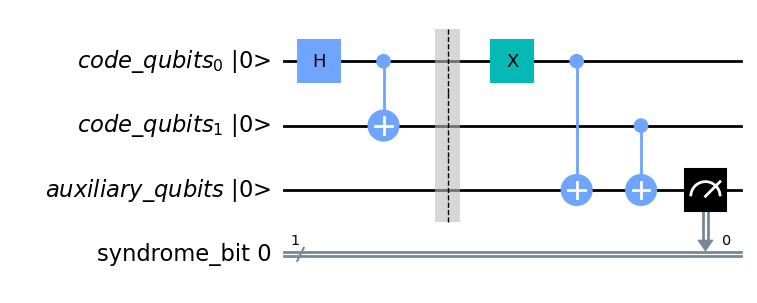

In [34]:
from qiskit.pulse import cx
# define 2 q register
qr1 = QuantumRegister(2,name='code_qubits')
qr2 = QuantumRegister(1,name='auxiliary_qubits')

# 1 classical register
cr1 = ClassicalRegister(1,name='syndrome_bit')

# create circuit
qc = QuantumCircuit (qr1,qr2,cr1)


# prepare in superposition
qc.h(qr1[0])
qc.cx(qr1[0],qr1[1])

qc.barrier()

# apply x gate
qc.x(qr1[0])


# apply x gate
#qc.x([qr1[0],qr1[1]])

# apply cx gate to both qubits
qc.cx(qr1[0],qr2[0])
qc.cx(qr1[1],qr2[0])

# measure auxiliary qubit
qc.measure(qr2[0], cr1[0])

# draw circuit
qc.draw(initial_state=True,output = 'mpl')

# Run on simulator

In [35]:
from qiskit.tools import job_monitor

# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
#circuit.save_statevector()

#assemble
qobj = assemble(qc)

#run
job = simulator.run(qobj)

# monitor job
job_monitor(job)

#get result
result = job.result()

# get counts
counts = result.get_counts()

# plot histogram
#plot_histogram(counts)
print(counts)

/tmp/ipython-input-35-1429258972.py:1: DeprecationWarning: 'job_monitor' has been deprecated and will be removed in Qiskit 1.0.0.
  from qiskit.tools import job_monitor
/tmp/ipython-input-35-1429258972.py:13: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run
{'1': 1024}


# Quantum Repetition Code

#Import Libraries

In [36]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import lookuptable_decoding


/tmp/ipython-input-36-1152350659.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.topological_codes import RepetitionCode


# Create repetition code circuit

In [37]:
# number of physical qubits
n = 3

# round of syndrome measurement
T = 1

code = RepetitionCode(n,T)

# Repetition code return 2 circuit

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


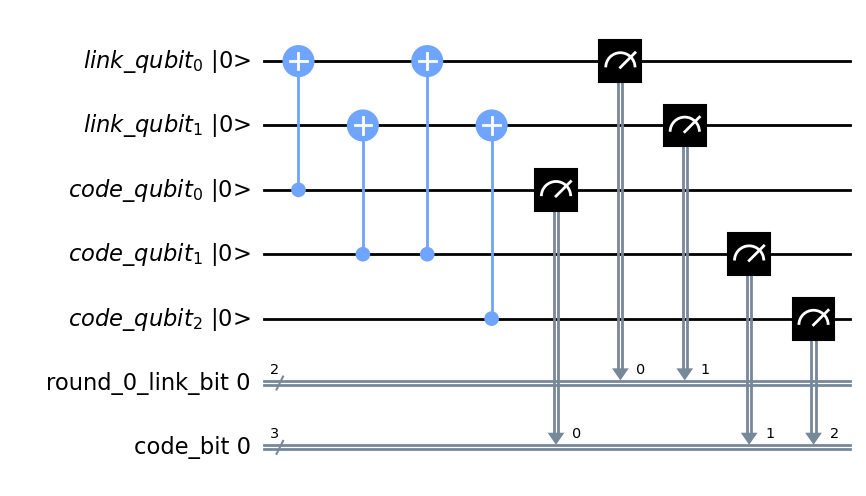

In [38]:
code.circuit['0'].draw(initial_state=True,output='mpl')

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


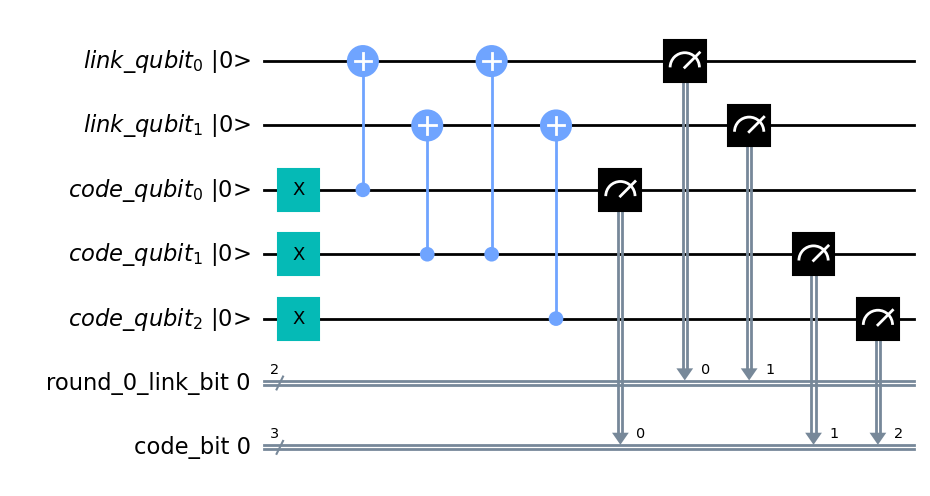

In [39]:
code.circuit['1'].draw(initial_state=True,output='mpl')

# Run on simulator without noise

In [40]:
def get_raw_results(code,noise_model =None):
  circuits = code.get_circuit_list()
  raw_results = {} # Fixed the typo here

  for log in range(2):
    qobj = assemble(circuits[log])
    job = simulator.run(qobj,noise_model = noise_model)
    raw_results[str(log)] = job.result().get_counts(str(log))

  return raw_results

raw_results = get_raw_results(code)

for log in raw_results:
  print('Logical',log,':',raw_results[log],'\n')

Logical 0 : {'000 00': 1024} 

Logical 1 : {'111 00': 1024} 



/tmp/ipython-input-40-702338911.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj,noise_model = noise_model)


# Multi round syndrome measuremnet

In [41]:
# number of physical qubits
n = 3

# round of syndrome measurement
T = 4

code = RepetitionCode(n,T)

# Run on simulator without noise

In [42]:
def get_raw_results(code,noise_model =None):
  circuits = code.get_circuit_list()
  raw_results = {} # Fixed the typo here

  for log in range(2):
    qobj = assemble(circuits[log])
    job = simulator.run(qobj,noise_model = noise_model)
    raw_results[str(log)] = job.result().get_counts(str(log))

  return raw_results

raw_results = get_raw_results(code)

for log in raw_results:
  print('Logical',log,':',raw_results[log],'\n')

Logical 0 : {'000 00 00 00 00': 1024} 

Logical 1 : {'111 00 00 00 00': 1024} 



/tmp/ipython-input-42-702338911.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj,noise_model = noise_model)


# Repetition code with noise

In [43]:
# number of physical qubits
n = 3

# round of syndrome measurement
T = 1

code = RepetitionCode(n,T)

# Create noise model for repetition code

In [44]:
noise_model = get_noise(0.05,0.05)

# Run on simulator with noise model

In [45]:
def get_raw_results(code,noise_model = noise_model):
  circuits = code.get_circuit_list()
  raw_results = {} # Fixed the typo here

  for log in range(2):
    qobj = assemble(circuits[log])
    job = simulator.run(qobj,noise_model = noise_model)
    raw_results[str(log)] = job.result().get_counts(str(log))

  return raw_results

raw_results = get_raw_results(code)

for log in raw_results:
  print('Logical',log,':',raw_results[log],'\n')

Logical 0 : {'000 11': 2, '010 10': 3, '000 00': 790, '000 10': 40, '100 00': 33, '001 00': 42, '100 10': 2, '000 01': 50, '011 00': 4, '010 01': 4, '001 01': 3, '100 01': 1, '010 00': 42, '001 10': 2, '101 00': 2, '110 00': 4} 

Logical 1 : {'110 10': 2, '101 10': 3, '011 10': 3, '111 10': 47, '011 00': 46, '010 00': 1, '111 01': 33, '101 00': 49, '111 00': 774, '101 01': 3, '110 01': 4, '110 00': 51, '111 11': 2, '001 00': 3, '100 00': 1, '011 01': 2} 



/tmp/ipython-input-45-325403274.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj,noise_model = noise_model)


# Look up table decoding

In [46]:
def get_table_results(code,noise_model = noise_model):
  circuits = code.get_circuit_list()
  table_results = {} # Fixed the typo here

  for log in range(2):
    qobj = assemble(circuits[log],shots=10000)
    job = simulator.run(qobj,noise_model = noise_model)
    table_results[str(log)] = job.result().get_counts(str(log))

  return table_results

table_results = get_table_results(code)

for log in table_results:
  print('Logical',log,':',table_results[log],'\n')

Logical 0 : {'101 10': 1, '011 01': 1, '100 11': 4, '011 00': 14, '011 10': 3, '010 10': 22, '001 00': 399, '100 00': 411, '000 00': 7753, '000 10': 394, '100 10': 16, '000 01': 432, '010 00': 395, '001 10': 19, '110 01': 1, '000 11': 24, '101 00': 25, '110 00': 19, '110 10': 1, '100 01': 22, '010 01': 19, '001 01': 25} 

Logical 1 : {'000 00': 1, '110 01': 18, '010 00': 16, '001 10': 2, '101 10': 17, '111 11': 18, '110 00': 425, '011 00': 429, '110 11': 3, '100 00': 22, '001 00': 19, '111 10': 416, '011 01': 20, '111 01': 391, '101 00': 389, '101 11': 1, '111 00': 7750, '101 01': 26, '011 10': 14, '100 01': 1, '001 01': 1, '010 01': 3, '110 10': 18} 



/tmp/ipython-input-46-281369973.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj,noise_model = noise_model)


# Call look up table decoding + probability of incorrect decoding

In [47]:
p = lookuptable_decoding(table_results,raw_results)
print('Probability of incorrect decoding P =',p)

Probability of incorrect decoding P = {'0': 0.009765625, '1': 0.0048828125}


In [48]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


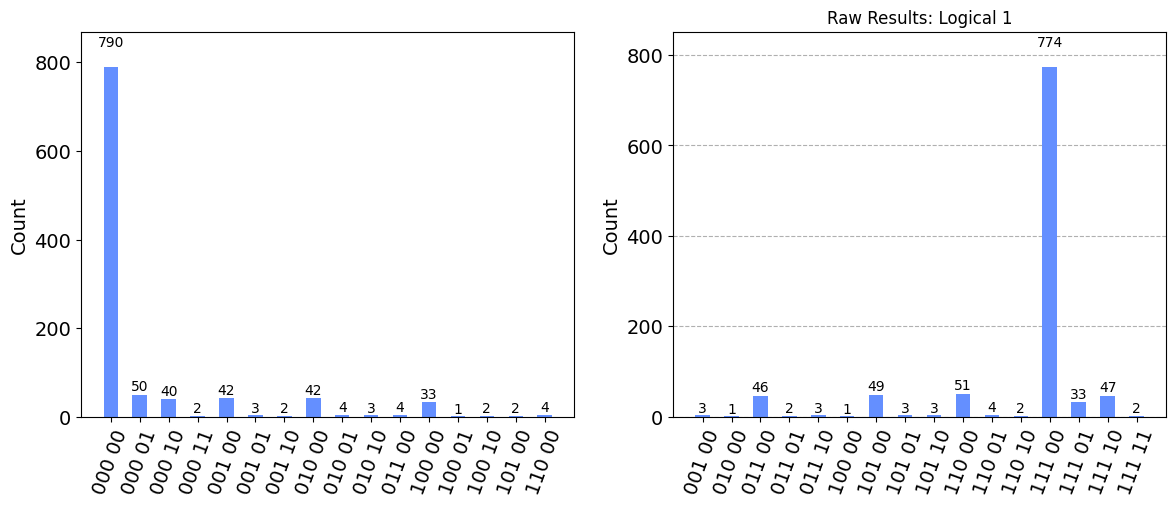

In [49]:
# Plot raw results for logical 0 and logical 1
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

plot_histogram(raw_results['0'], title='Raw Results: Logical 0', ax=axs[0])
plot_histogram(raw_results['1'], title='Raw Results: Logical 1', ax=axs[1])

plt.show()


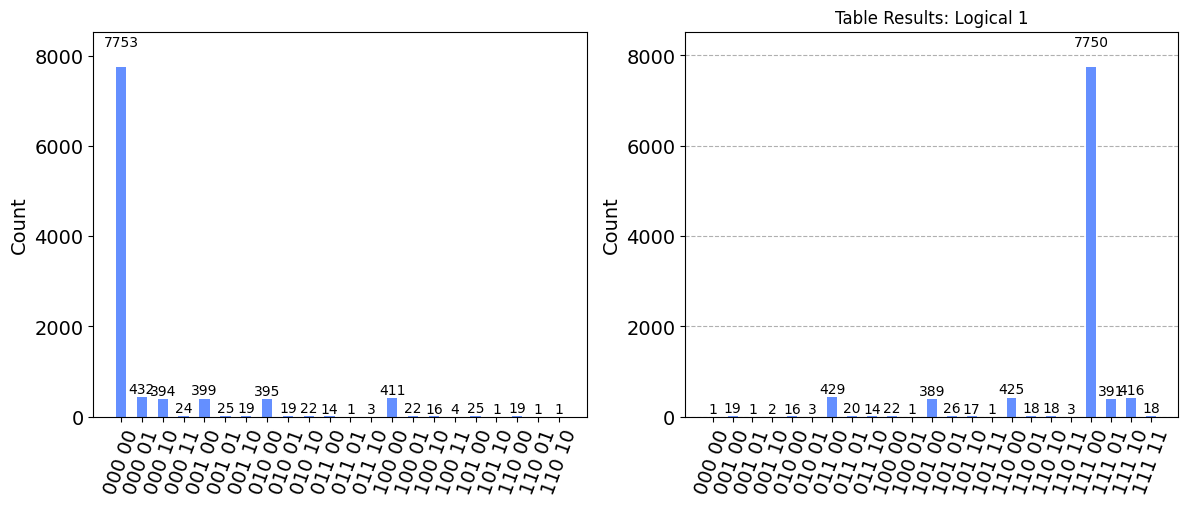

In [50]:
# Plot table results for logical 0 and logical 1
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

plot_histogram(table_results['0'], title='Table Results: Logical 0', ax=axs[0])
plot_histogram(table_results['1'], title='Table Results: Logical 1', ax=axs[1])

plt.show()
